# EDA Car Data Set

**We will explore the Car Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**

- **Removing duplicates**
- **Missing value treatment**
- **Outlier Treatment**
- **Normalization and Scaling( Numerical Variables)**
- **Encoding Categorical variables( Dummy Variables)**
- **Bivariate Analysis**

**As a first step, we will import all the necessary libraries that we think we will requiring to perform the EDA.**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data set

**We will  be loading the EDA cars excel file using pandas. For this we will be using read_excel file.**

In [2]:
df=pd.read_excel('EDA Cars New.xlsx')

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [3]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.4,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,******,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,@@,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130795,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


**head function will tell you the top records in the data set. By default python shows you only top 5 records.**

In [25]:
df.shape

(303, 13)

**Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The cars data set has 303 observations and 13 variables in the data set.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
INDEX             303 non-null int64
INCOME            258 non-null float64
MARITAL STATUS    275 non-null object
SEX               297 non-null object
EDUCATION         259 non-null object
JOB               257 non-null object
TRAVEL TIME       262 non-null float64
USE               250 non-null object
MILES CLOCKED     278 non-null float64
CAR TYPE          293 non-null object
CAR AGE           283 non-null float64
CITY              297 non-null object
POSTAL CODE       300 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


In [3]:
dfnew = df[df['INCOME'].apply(lambda x: type(x) == str)]


In [4]:
dfnew

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
2,3,******,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,@@,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0


**info() is used to check the Information about the data and the datatypes of each respective attributes.**

In [5]:
df['INCOME'].replace(to_replace = '@@', value = np.nan, inplace=True)
df['INCOME'].replace(to_replace = '******', value = np.nan, inplace=True)

In [6]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,NaN,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,NaN,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [9]:
df['INCOME'].astype(float, inplace = True)

0      125301.242500
1       50815.445310
2                NaN
3                NaN
4      130794.574200
5                NaN
6       87460.052690
7                NaN
8                NaN
9                NaN
10      16988.721350
11               NaN
12      16352.029310
13      63952.177660
14      24059.721570
15      20821.846300
16               NaN
17     137102.734200
18     102393.179900
19      40656.448990
20               NaN
21      31773.103960
22      38035.583470
23          0.000000
24          0.000000
25               NaN
26      44705.212810
27      31738.356270
28      64013.816320
29      53244.412830
           ...      
273         0.000000
274     55352.907110
275    105276.621800
276     71197.083570
277     33644.069440
278     16227.428750
279     66840.831240
280     46927.747990
281     17566.513550
282     58504.008150
283      6017.600091
284     32708.121490
285         0.000000
286     20764.880450
287     32956.010820
288         0.000000
289          

In [10]:
df["INCOME"].mean()

49870.01695223257

In [7]:
df.describe()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTAL CODE
count,303.000000,260.000000,262.000000,278.000000,283.000000,300.000000
mean,139.640264,50025.162170,34.282098,13591.978417,6.265018,50712.196667
std,85.178422,41186.807914,14.910178,7167.328655,5.111218,24141.029290
min,1.000000,0.000000,5.000000,1500.000000,1.000000,11435.000000
25%,62.500000,20452.885022,24.449874,7900.000000,1.000000,42420.000000
50%,138.000000,44571.590870,33.564757,12065.000000,6.000000,47150.000000
75%,213.500000,66485.761387,43.907339,18240.000000,10.000000,61701.000000
max,289.000000,204667.589700,83.617643,38000.000000,20.000000,90049.000000


**The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.**

# Check for Duplicate records

In [35]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


**Since we have 14 duplicate records in the data, we will remove this from the data set so that we get only distinct records.**

In [34]:
df.drop_duplicates(inplace=True) 

**Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.**

In [10]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


**Now, we can  clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute as those 14 records should be removed from the original data. Initially it had 303 records now it should have 289**

In [36]:
df.shape

(289, 13)

In [38]:
df.isnull().sum()

INDEX              0
INCOME            45
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

# Outlier Treatment

**To check for outliers, we will be plotting the box plots.**

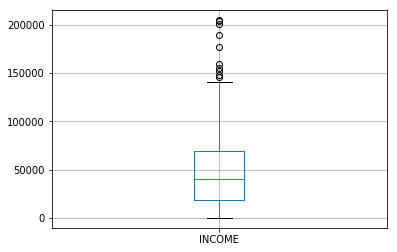

In [12]:
df.boxplot(column=['INCOME'])
plt.show()

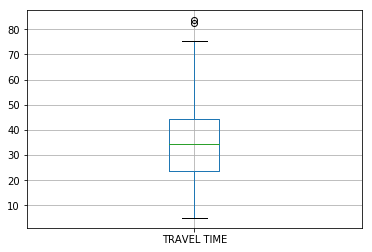

In [13]:
df.boxplot(column=['TRAVEL TIME'])
plt.show()

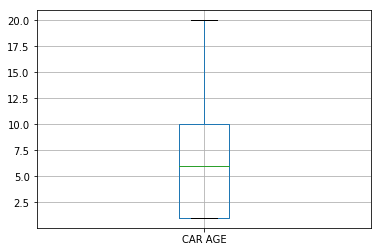

In [14]:
df.boxplot(column=['CAR AGE'])
plt.show()

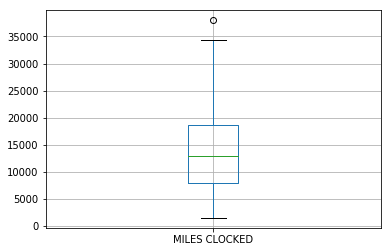

In [15]:
df.boxplot(column=['MILES CLOCKED'])
plt.show()

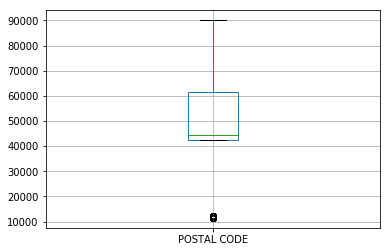

In [16]:
df.boxplot(column=['POSTAL CODE'])
plt.show()

**Looking at the box plot, it seems that the three variables INCOME, MILES CLOCKED and TRAVEL TIME have outlier present in the variables.**

**These outliers value needs to be teated and there are several ways of treating them:**
    
- **Drop the outlier value**
- **Replace the outlier value using the IQR**



**Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [40]:
lrincome,urincome=remove_outlier(df['INCOME'])
df['INCOME']=np.where(df['INCOME']>urincome,urincome,df['INCOME'])
df['INCOME']=np.where(df['INCOME']<lrincome,lrincome,df['INCOME'])


lrtravel,urtravel=remove_outlier(df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']>urtravel,urtravel,df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']<lrtravel,lrtravel,df['TRAVEL TIME'])

lrmiles,urmiles=remove_outlier(df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']>urmiles,urmiles,df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']<lrmiles,lrmiles,df['MILES CLOCKED'])

lrpsotal,urpostal=remove_outlier(df['POSTAL CODE'])
df['POSTAL CODE']=np.where(df['POSTAL CODE']>urpostal,urpostal,df['POSTAL CODE'])
df['POSTAL CODE']=np.where(df['POSTAL CODE']<lrpsotal,lrpsotal,df['POSTAL CODE'])

df.shape

(289, 13)

##  Make Boxplots after Outlier Treatment

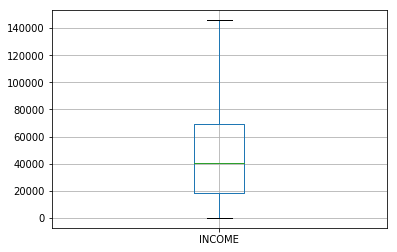

In [19]:
df.boxplot(column=['INCOME'])
plt.show()

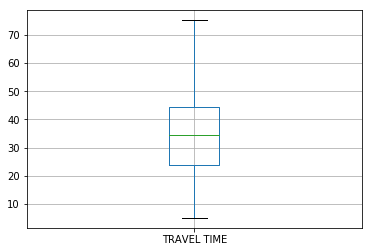

In [20]:
df.boxplot(column=['TRAVEL TIME'])
plt.show()

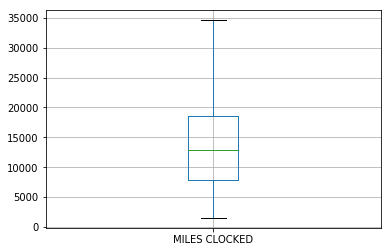

In [21]:
df.boxplot(column=['MILES CLOCKED'])
plt.show()

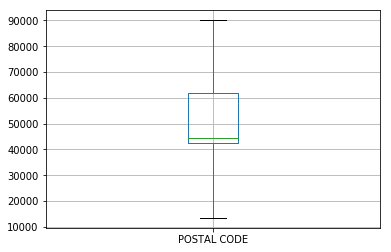

In [22]:
df.boxplot(column=['POSTAL CODE'])
plt.show()

**If you look at the box plots above,post treating the outlier there are no outliers in all these columns.**

# Check for missing value

In [23]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

**We can see that we have various missing values in respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.**

- **Drop the missing values : In this case we drop the missing values from those variables. In case there are very few missing values you can drop those values.**

- **Impute with mean value : For numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values .i.e. outliers.**

- **Impute with median value : For numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use median approach.**

- **Impute with mode value : For categorical column, you can replace the missing values with mode values i.e the frequent ones.**

**In this exercise, we will replace the numerical columns with median values and for categorical columns we will replace the missing values with mode values.**

In [24]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

INCOME            float64
MARITAL STATUS     object
SEX                object
EDUCATION          object
JOB                object
TRAVEL TIME       float64
USE                object
MILES CLOCKED     float64
CAR TYPE           object
CAR AGE           float64
CITY               object
POSTAL CODE       float64
dtype: object

**Replacing NULL values in Numerical Columns using Median**

In [25]:
median1=df["INCOME"].median()
median2=df["TRAVEL TIME"].median()
median3=df["MILES CLOCKED"].median()
median4=df["CAR AGE"].median()
median5=df["POSTAL CODE"].median()

df["INCOME"].replace(np.nan,median1,inplace=True)
df["TRAVEL TIME"].replace(np.nan,median2,inplace=True)
df["MILES CLOCKED"].replace(np.nan,median3,inplace=True)
df["CAR AGE"].replace(np.nan,median4,inplace=True)
df["POSTAL CODE"].replace(np.nan,median5,inplace=True)

**Replacing NULL values in Categorical Columns using Mode**

In [26]:
mode1=df["SEX"].mode().values[0]
mode2=df["MARITAL STATUS"].mode().values[0]
mode3=df["EDUCATION"].mode().values[0]
mode4=df["JOB"].mode().values[0]
mode5=df["USE"].mode().values[0]
mode6=df['CITY'].mode().values[0]
mode7=df["CAR TYPE"].mode().values[0]


df["SEX"]=df["SEX"].replace(np.nan,mode1)
df["MARITAL STATUS"]= df["MARITAL STATUS"].replace(np.nan,mode2)
df["EDUCATION"]=df["EDUCATION"].replace(np.nan,mode3)
df["JOB"]=df["JOB"].replace(np.nan,mode4)
df["USE"]=df["USE"].replace(np.nan,mode5)
df["CAR TYPE"]=df["CAR TYPE"].replace(np.nan,mode7)
df['CITY']=df['CITY'].replace(np.nan,mode6)

In [27]:
# Check for missing value in any column
df.isnull().sum()

INDEX             0
INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
POSTAL CODE       0
dtype: int64

# Bivariate Analysis

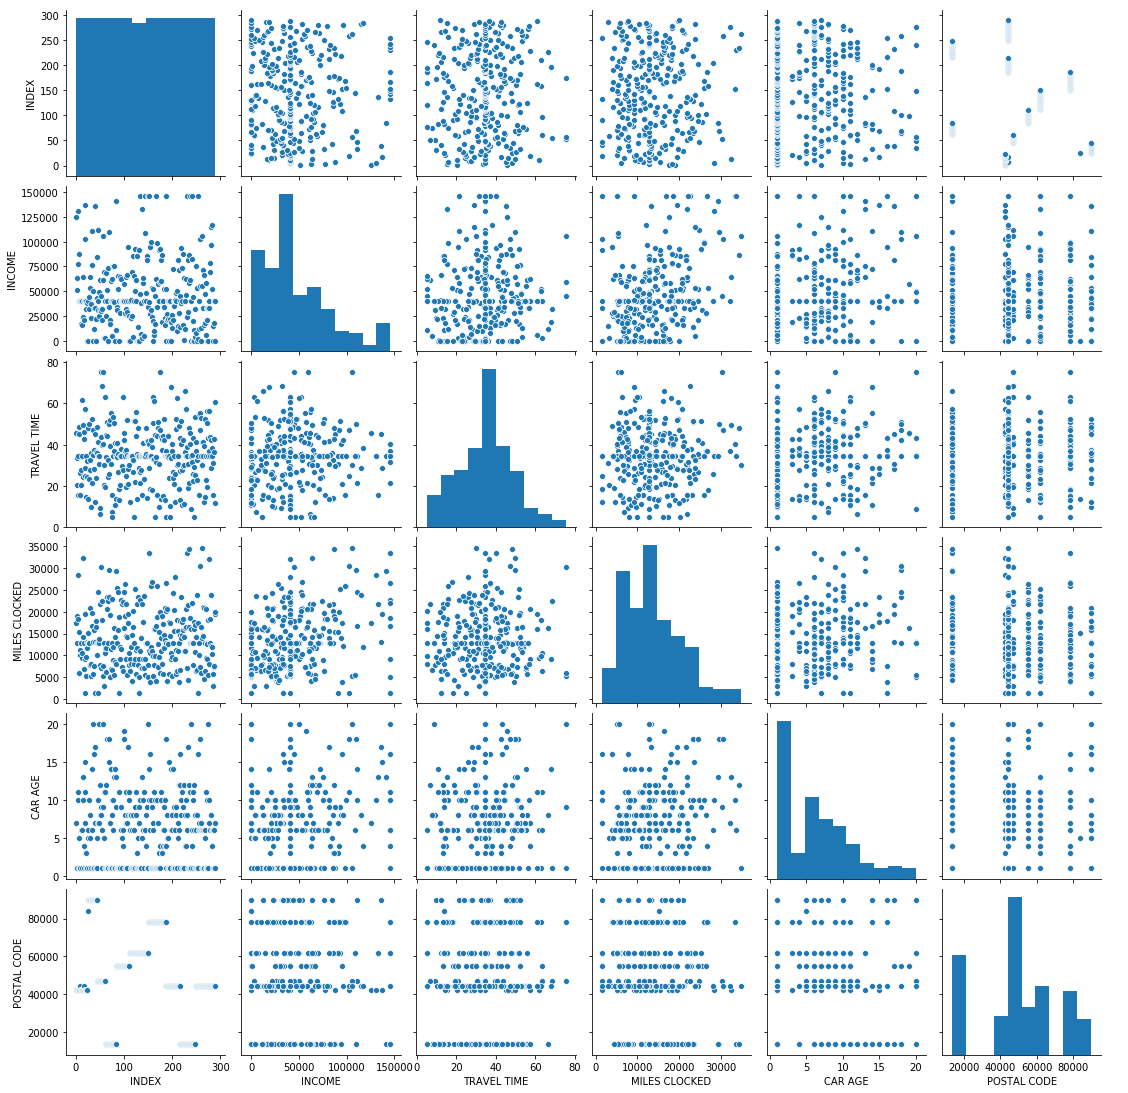

In [28]:
sns.pairplot(df)
plt.show()

**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.**

In [41]:
df.corr()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTAL CODE
INDEX,1.000000,-0.035606,0.019612,0.042400,-0.026976,-0.247716
INCOME,-0.035606,1.000000,0.077438,0.374985,0.316104,0.036295
TRAVEL TIME,0.019612,0.077438,1.000000,0.025013,0.164480,0.019409
MILES CLOCKED,0.042400,0.374985,0.025013,1.000000,0.141708,-0.124080
CAR AGE,-0.026976,0.316104,0.164480,0.141708,1.000000,-0.102653
POSTAL CODE,-0.247716,0.036295,0.019409,-0.124080,-0.102653,1.000000


## Correlation Heatmap

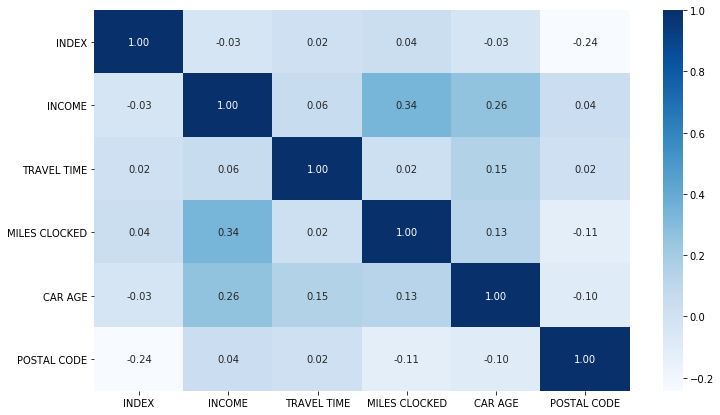

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

# Normalizing and Scaling

**Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables.**

In [31]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
df['INCOME'] = std_scale.fit_transform(df[['INCOME']])
df['TRAVEL TIME'] = std_scale.fit_transform(df[['TRAVEL TIME']])
df['CAR AGE'] = std_scale.fit_transform(df[['CAR AGE']])
df['POSTAL CODE'] = std_scale.fit_transform(df[['POSTAL CODE']])
df['MILES CLOCKED']= std_scale.fit_transform(df[['MILES CLOCKED']])

In [33]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,2.186892,No,F,Bachelors,Blue Collar,0.813273,Commercial,0.529946,Sports Car,0.137267,Texas,-0.297989
1,2,0.108850,No,M,High School,Blue Collar,-0.981463,Private,0.748411,Minivan,-1.052842,Texas,-0.297989
2,3,0.448162,No,F,Bachelors,Clerical,-0.048886,Private,-0.137830,SUV,-1.052842,Texas,-0.297989
3,4,0.842148,No,F,High School,Lawyer,-1.351394,Private,0.656656,Sports Car,0.930674,Texas,-0.297989
4,5,2.340148,No,M,High School,Blue Collar,0.007325,Commercial,2.118917,Panel Truck,0.732322,Texas,-0.297989


**If you look at the variables INCOME, TRAVEL TIME, CAR AGE and POSTAL CODE all has been normalized and scaled in one scale now.**

# ENCODING

**One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.**

**This is required to do since the machine learning algorithms only works on the numerical data. That is why there is a need to convert the categorical column into numerical one.**

**get_dummies is the method which creates dummy variable for each categorical variable.**

**It is considered a good practice to set parameter `drop_first` as `True` whenever get_dummies is used. It reduces the chances of multicollinearity which will be covered in coming courses and the number of features are also less as compared to `drop_first=False`**

In [34]:
dummies=pd.get_dummies(df[["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]], columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"], prefix=["married", "sex","Education","Job","Use","cartype","city"],drop_first=True).head()

In [35]:
columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]
df = pd.concat([df, dummies], axis=1)

# drop original column "fuel-type" from "df"
df.drop(columns, axis = 1, inplace=True)

In [36]:
df.head()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTAL CODE,married_Yes,sex_M,Education_High School,Education_Masters,...,city_Houston,city_Las Vegas,city_Los Angeles,city_New Albany,city_New York City,city_Philadelphia,city_San Francisco,city_Seattle,city_Texas,city_Washington
0,1,2.186892,0.813273,0.529946,0.137267,-0.297989,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.108850,-0.981463,0.748411,-1.052842,-0.297989,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.448162,-0.048886,-0.137830,-1.052842,-0.297989,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,0.842148,-1.351394,0.656656,0.930674,-0.297989,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,2.340148,0.007325,2.118917,0.732322,-0.297989,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**In the data set, each Category in all of the categorical columns have been added as columns with values 0 and 1**
**Example: married_Yes, sex_M, Education_High School
**If sex_M =1, then it means its a Male and sex_M=0 means its a Female**